<a id='3'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Loading Libraries </h2> </div>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Basic
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

<a id='4'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Extraction </h2> </div>

In [3]:
train_path = "/content/drive/MyDrive/train (1) اخر امل.zip"
test_path = "/content/drive/MyDrive/test1 اخر امل.zip"

files = "/kaggle/working/"

import zipfile

with zipfile.ZipFile(train_path, 'r') as zipp:
    zipp.extractall(files)

with zipfile.ZipFile(test_path, 'r') as zipp:
    zipp.extractall(files)

### Loading Images in a Dataframe

In [4]:
image_dir = "/kaggle/working/train"

filenames = os.listdir(image_dir)
labels = [x.split(".")[0] for x in filenames]

data = pd.DataFrame({"filename": filenames, "label": labels})

data.head()

,filename,label
0,dog.3850.jpg,dog
1,dog.8971.jpg,dog
2,cat.966.jpg,cat
3,dog.8597.jpg,dog
4,cat.1525.jpg,cat


<a id='5'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Exploration </h2> </div>

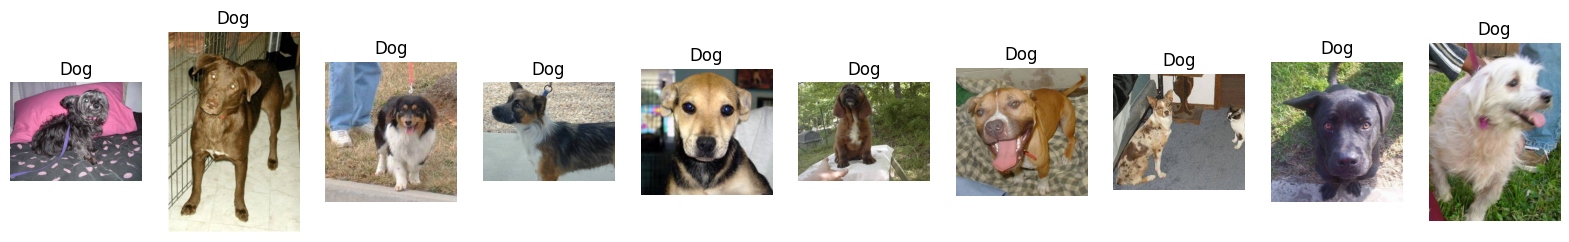

In [5]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):

    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = '/kaggle/working/train/' + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Dog',fontsize=12)
    plt.axis('off')

plt.show()

<h5 style="text-align:center;color:Red">We visualize few images of Cats. </h5>

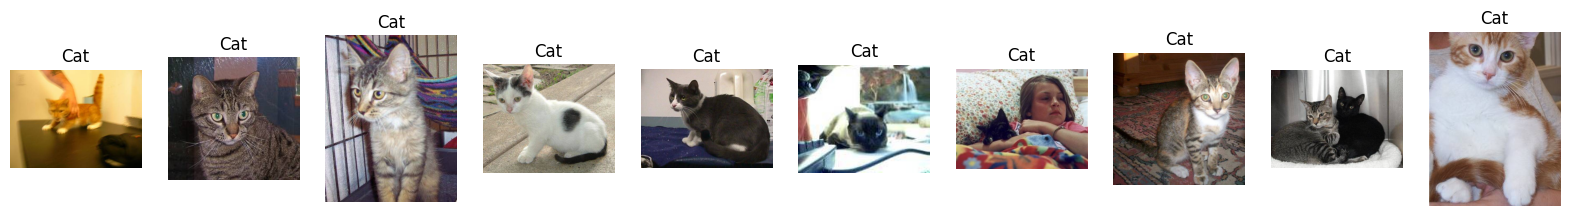

In [6]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):

    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = '/kaggle/working/train/' + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Cat',fontsize=12)
    plt.axis('off')

plt.show()

<a id='6'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Train Test Split </h2> </div>

<a id='7'></a>
<div class="alert alert-block alert-warning"><h4 style="text-align:center;color:black"> Using Dataframe </h4> </div>

In [7]:
# train test split using dataframe

labels = data['label']

X_train, X_temp = train_test_split(data, test_size=0.2, stratify=labels, random_state = 42)

label_test_val = X_temp['label']

X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state = 42)

print('The shape of train data',X_train.shape)
print('The shape of test data',X_test.shape)
print('The shape of validation data',X_val.shape)

The shape of train data (20000, 2)
The shape of test data (2500, 2)
The shape of validation data (2500, 2)


<ipython-input-8-418fb063fcee>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.2).set_title('Class distribution in Training set',fontsize=15)
<ipython-input-8-418fb063fcee>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.2).set_title('Class distribution in validation set',fontsize=15)
<ipython-input-8-418fb063fcee>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire',widt

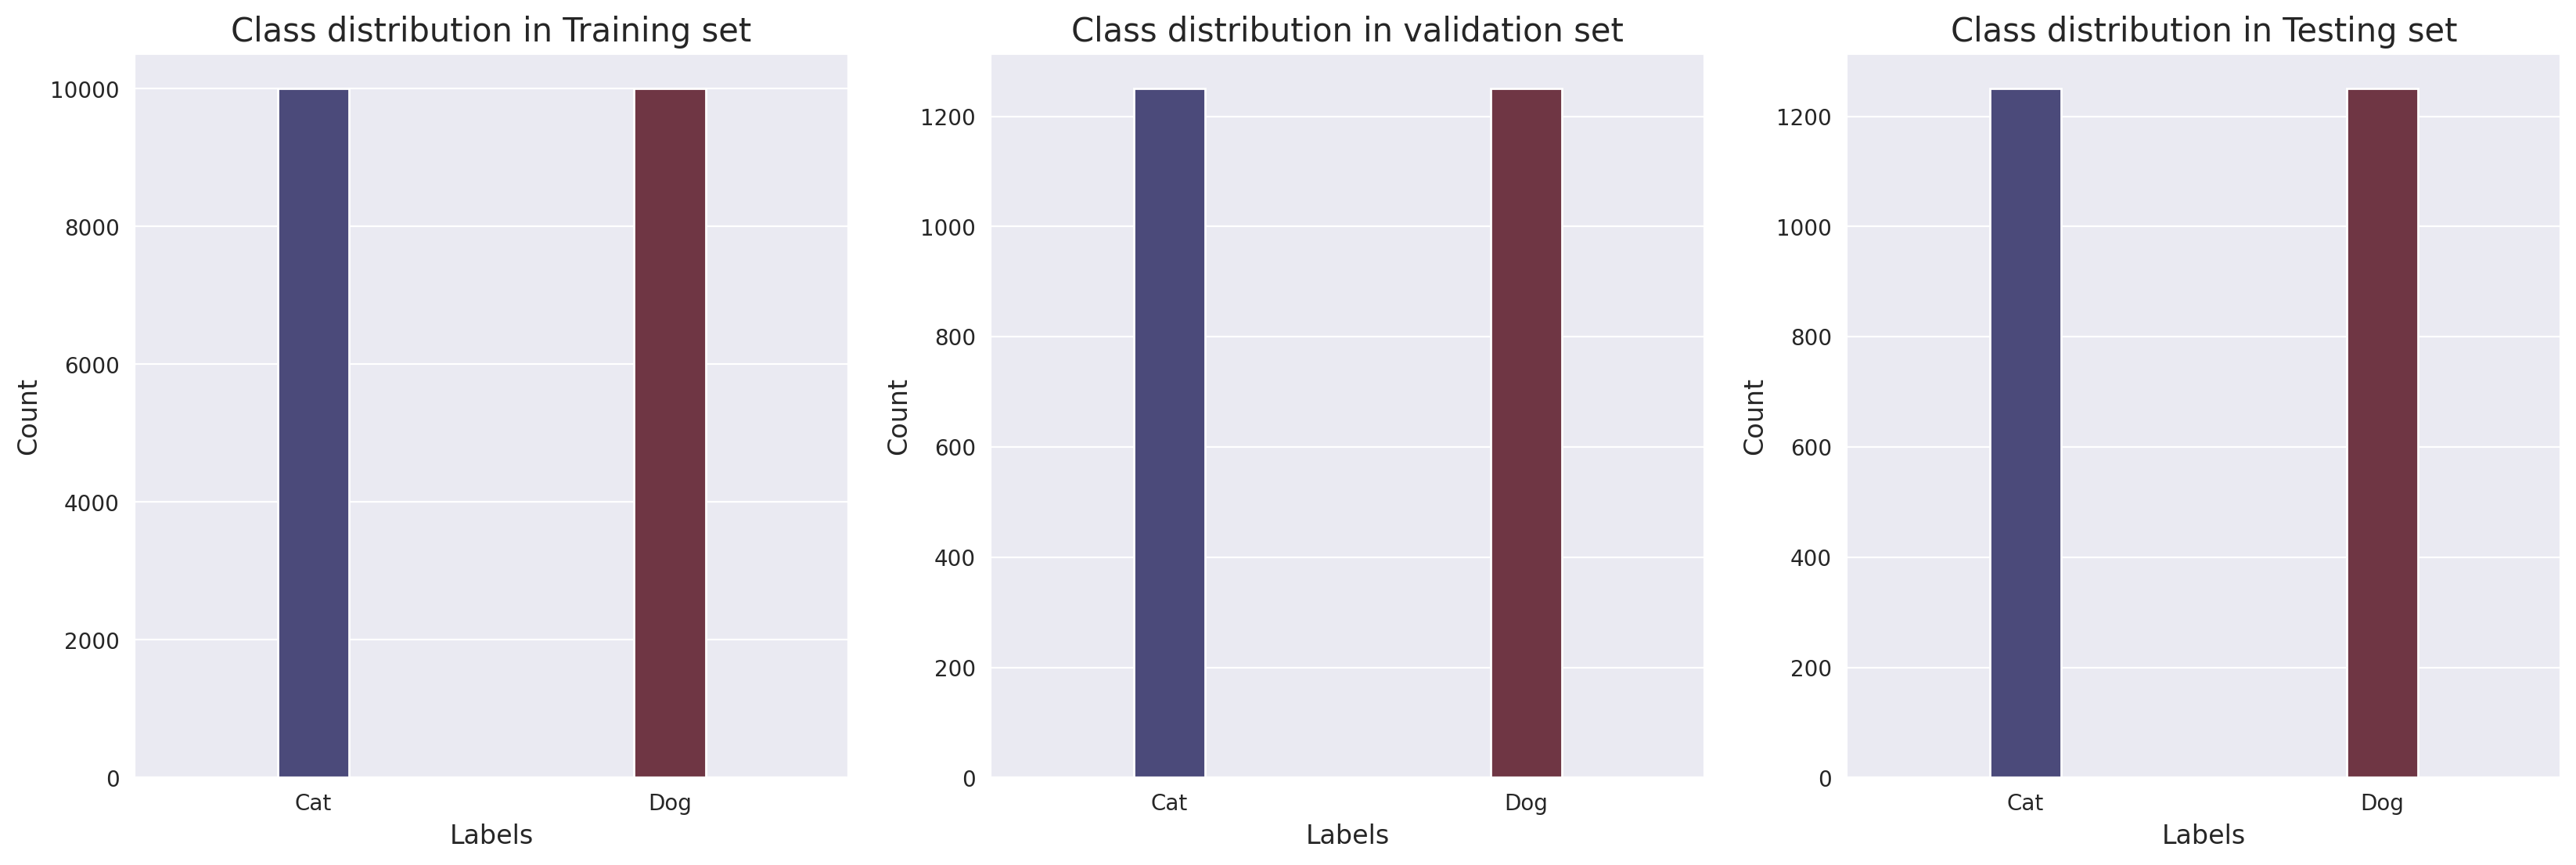

In [8]:
labels = ['Cat','Dog']

label1,count1 = np.unique(X_train.label,return_counts=True)
label2,count2 = np.unique(X_val.label,return_counts=True)
label3,count3 = np.unique(X_test.label,return_counts=True)

uni1 = pd.DataFrame(data=count1,index=labels,columns=['Count1'])
uni2 = pd.DataFrame(data=count2,index=labels,columns=['Count2'])
uni3 = pd.DataFrame(data=count3,index=labels,columns=['Count3'])


plt.figure(figsize=(20,6),dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.2).set_title('Class distribution in Training set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.2).set_title('Class distribution in validation set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.subplot(133)
sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire',width=0.2).set_title('Class distribution in Testing set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

<a id='8'></a>
<div class="alert alert-block alert-warning"><h4 style="text-align:center;color:black"> Using Directory </h4> </div>

In [9]:
# create directories
dataset_home = '/kaggle/working/dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']

for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.2
# copy training dataset images into subdirectories
src_directory = '/kaggle/working/train/'
for file in listdir(src_directory):
        src = src_directory + '/' + file
        dst_dir = 'train/'
        if random() < val_ratio:
            dst_dir = 'test/'
        if file.startswith('cat'):
            dst = dataset_home + dst_dir + 'cats/' + file
            copyfile(src, dst)
        elif file.startswith('dog'):
            dst = dataset_home + dst_dir + 'dogs/' + file
            copyfile(src, dst)


path1 = "/kaggle/working/dataset_dogs_vs_cats/train/cats"
path2 = "/kaggle/working/dataset_dogs_vs_cats/train/dogs"
path3 = "/kaggle/working/dataset_dogs_vs_cats/test/cats"
path4 = "/kaggle/working/dataset_dogs_vs_cats/test/dogs"


print('Then number of cat images in training data is' ,len(os.listdir(path1)))
print('Then number of dog images in training data is' ,len(os.listdir(path2)))
print('Then number of cat images in validation data is' ,len(os.listdir(path3)))
print('Then number of dog images in validation data is' ,len(os.listdir(path4)))


Then number of cat images in training data is 9969
Then number of dog images in training data is 9941
Then number of cat images in validation data is 2531
Then number of dog images in validation data is 2559


<a id='9'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Preparation </h2> </div>



In [10]:
# parameters
image_size = 128
image_channel = 3
bat_size = 32

<a id='10'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black">Image Data Generator </h3> </div>




In [11]:
# Creating image data generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 15,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    fill_mode = 'reflect',
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

<a id='11'></a>
<div class="alert alert-block alert-warning"><h4 style="text-align:center;color:black"> Using Dataframe </h4> </div>

In [12]:
# Applying image data gernerator to train and test data

train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory = '/kaggle/working/train',
                                                    x_col= 'filename',
                                                    y_col= 'label',
                                                    batch_size = bat_size,
                                                    target_size = (image_size,image_size)
                                                   )
val_generator = test_datagen.flow_from_dataframe(X_val,
                                                 directory = '/kaggle/working/train',
                                                 x_col= 'filename',
                                                 y_col= 'label',
                                                 batch_size = bat_size,
                                                 target_size = (image_size,image_size),
                                                 shuffle=False
                                                )

test_generator = test_datagen.flow_from_dataframe(X_test,
                                                  directory = '/kaggle/working/train',
                                                  x_col= 'filename',
                                                  y_col= 'label',
                                                  batch_size = bat_size,
                                                  target_size = (image_size,image_size),
                                                  shuffle=False
                                                 )

Found 20000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


<a id='12'></a>
<div class="alert alert-block alert-warning"><h4 style="text-align:center;color:black"> Using Directory </h4> </div>

In [13]:
train_gen = train_datagen.flow_from_directory('/kaggle/working/dataset_dogs_vs_cats/train/',
                                              class_mode='binary',
                                              target_size = (image_size,image_size),
                                              batch_size = bat_size,
                                             )

val_gen = test_datagen.flow_from_directory('/kaggle/working/dataset_dogs_vs_cats/test/',
                                          class_mode='binary',
                                          batch_size = bat_size,
                                          target_size = (image_size,image_size),
                                          shuffle = False
                                         )

Found 19910 images belonging to 2 classes.
Found 5090 images belonging to 2 classes.


<a id='13'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Deep Learning Model </h2> </div>

In [18]:
model = Sequential()

# Input Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size,image_size,image_channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Bloack 1
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 2
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 3
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fully Connected layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 5,112,514 (19.50 MB)

 Trainable params: 5,110,530 (19.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

<a id='15'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Callbacks </h3> </div>
we will be using two callbacks -

* **ReduceLROnPlateau :** Reduce learning rate when a metric has stopped improving.
* **EarlyStopping :** Stop training when a monitored metric has stopped improving.

In [19]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 3,restore_best_weights=True,verbose=0)

<a id='23'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Compile the model </h3> </div>
Finally we will compile the model .There are 3 things to mention here : Optimizer,Loss, Metrics

* **Optimizer** :- To minimize cost function we use different methods For ex :- like gradient descent, stochastic gradient descent. So these are call optimizers. We are using a default one here which is adam.
​
* **Loss** :- To make our model better we either minimize loss or maximize accuracy. Neural Networks always minimize loss. To measure it we can use different formulas like 'categorical_crossentropy' or 'binary_crossentropy'. Here I have used binary_crossentropy.
​
* **Metrics** :- This is to denote the measure of your model. Can be accuracy or some other metric.

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

<a id='16'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Fit the model </h3> </div>

We are now going to train our compiled model using the train iterator (train_generator) and use the val iterator (val_generator) as a validation dataset during training.

The number of steps for the train and validation iterators must be specified. This is the number of batches that will comprise one epoch. This can be specified via the length of each iterator, and will be the total number of images in the train and validation directories divided by the batch size (32).

The model will be fit for 30 epochs.

In [21]:
# Define hyperparameters
hyperparameters = {
    "epochs": 20,                     # Number of training epochs
    "batch_size": 32,                 # Batch size for training
    "steps_per_epoch": 150,           # Steps per epoch
    "validation_steps": 50,           # Validation steps per epoch
    "shuffle": True,                  # Shuffle the training data
    "verbose": 1,                     # Verbosity level (1 = progress bar, 2 = one line per epoch)
    "initial_epoch": 0                # Start training from a specific epoch
}

# Fit the model
cat_dog = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=hyperparameters["steps_per_epoch"],
    validation_steps=hyperparameters["validation_steps"],
    epochs=hyperparameters["epochs"],
    shuffle=hyperparameters["shuffle"],
    verbose=hyperparameters["verbose"],
    initial_epoch=hyperparameters["initial_epoch"]
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.5901 - loss: 0.8768 - val_accuracy: 0.5019 - val_loss: 1.3637
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.6549 - loss: 0.6541 - val_accuracy: 0.4967 - val_loss: 1.6347
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


150/150 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.6959 - loss: 0.5979 - val_accuracy: 0.5806 - val_loss: 0.7308
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.7185 - loss: 0.5648 - val_accuracy: 0.6678 - val_loss: 0.6312
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 70s 453ms/step - accuracy: 0.7165 - loss: 0.5779 - val_accuracy: 0.6669 - val_loss: 0.7049
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.7269 - loss: 0.5385 - val_accuracy: 0.7144 - val_loss: 0.5958
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.7509 - loss: 0.5179 - val_accuracy: 0.6037 - val_loss: 0.9157
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.7470 - loss: 0.4977 - val_accuracy: 0.7556 - val_loss: 0.5089
Epoch 9/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.7715 - loss: 0.4847 - val_accuracy: 0.7050 - val_loss: 0.5928
Epoch 10/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 61s 399ms/step - accuracy: 0.8097 - loss: 0.4231 - val_accuracy: 

In [22]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 83.81999731063843
The Loss of the model for training data is: 0.3675975501537323
The accuracy of the model for validation data is: 83.88000130653381
The Loss of the model for validation data is: 0.35884740948677063


In [ ]:
cat_dog = model.fit(train_generator,
                    validation_data = val_generator,
                    callbacks=[early_stoping,learning_rate_reduction],
                    epochs = 15,
                    # steps_per_epoch = len(train_generator),
                    # validation_steps = len(val_generaotor),
                   )

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7380 - loss: 0.5339

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1452s 2s/step - accuracy: 0.7380 - loss: 0.5339 - val_accuracy: 0.7244 - val_loss: 0.5778 - learning_rate: 0.0010
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1429s 2s/step - accuracy: 0.7913 - loss: 0.4497 - val_accuracy: 0.8104 - val_loss: 0.4174 - learning_rate: 0.0010
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1414s 2s/step - accuracy: 0.8210 - loss: 0.3948 - val_accuracy: 0.5964 - val_loss: 0.8616 - learning_rate: 0.0010
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8453 - loss: 0.3448
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
625/625 ━━━━━━━━━━━━━━━━━━━━ 1421s 2s/step - accuracy: 0.8453 - loss: 0.3448 - val_accuracy: 0.7080 - val_loss: 0.5372 - learning_rate: 0.0010
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1402s 2s/step - accuracy: 0.8763 - loss: 0.2929 - val_accuracy: 0.8884 - val_loss: 0.2593 - learning_rate: 5.0000e-04
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1417s 2s/step - accuracy: 0.8927 - loss: 0.2572

<a id='17'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Plot the results </h3> </div>

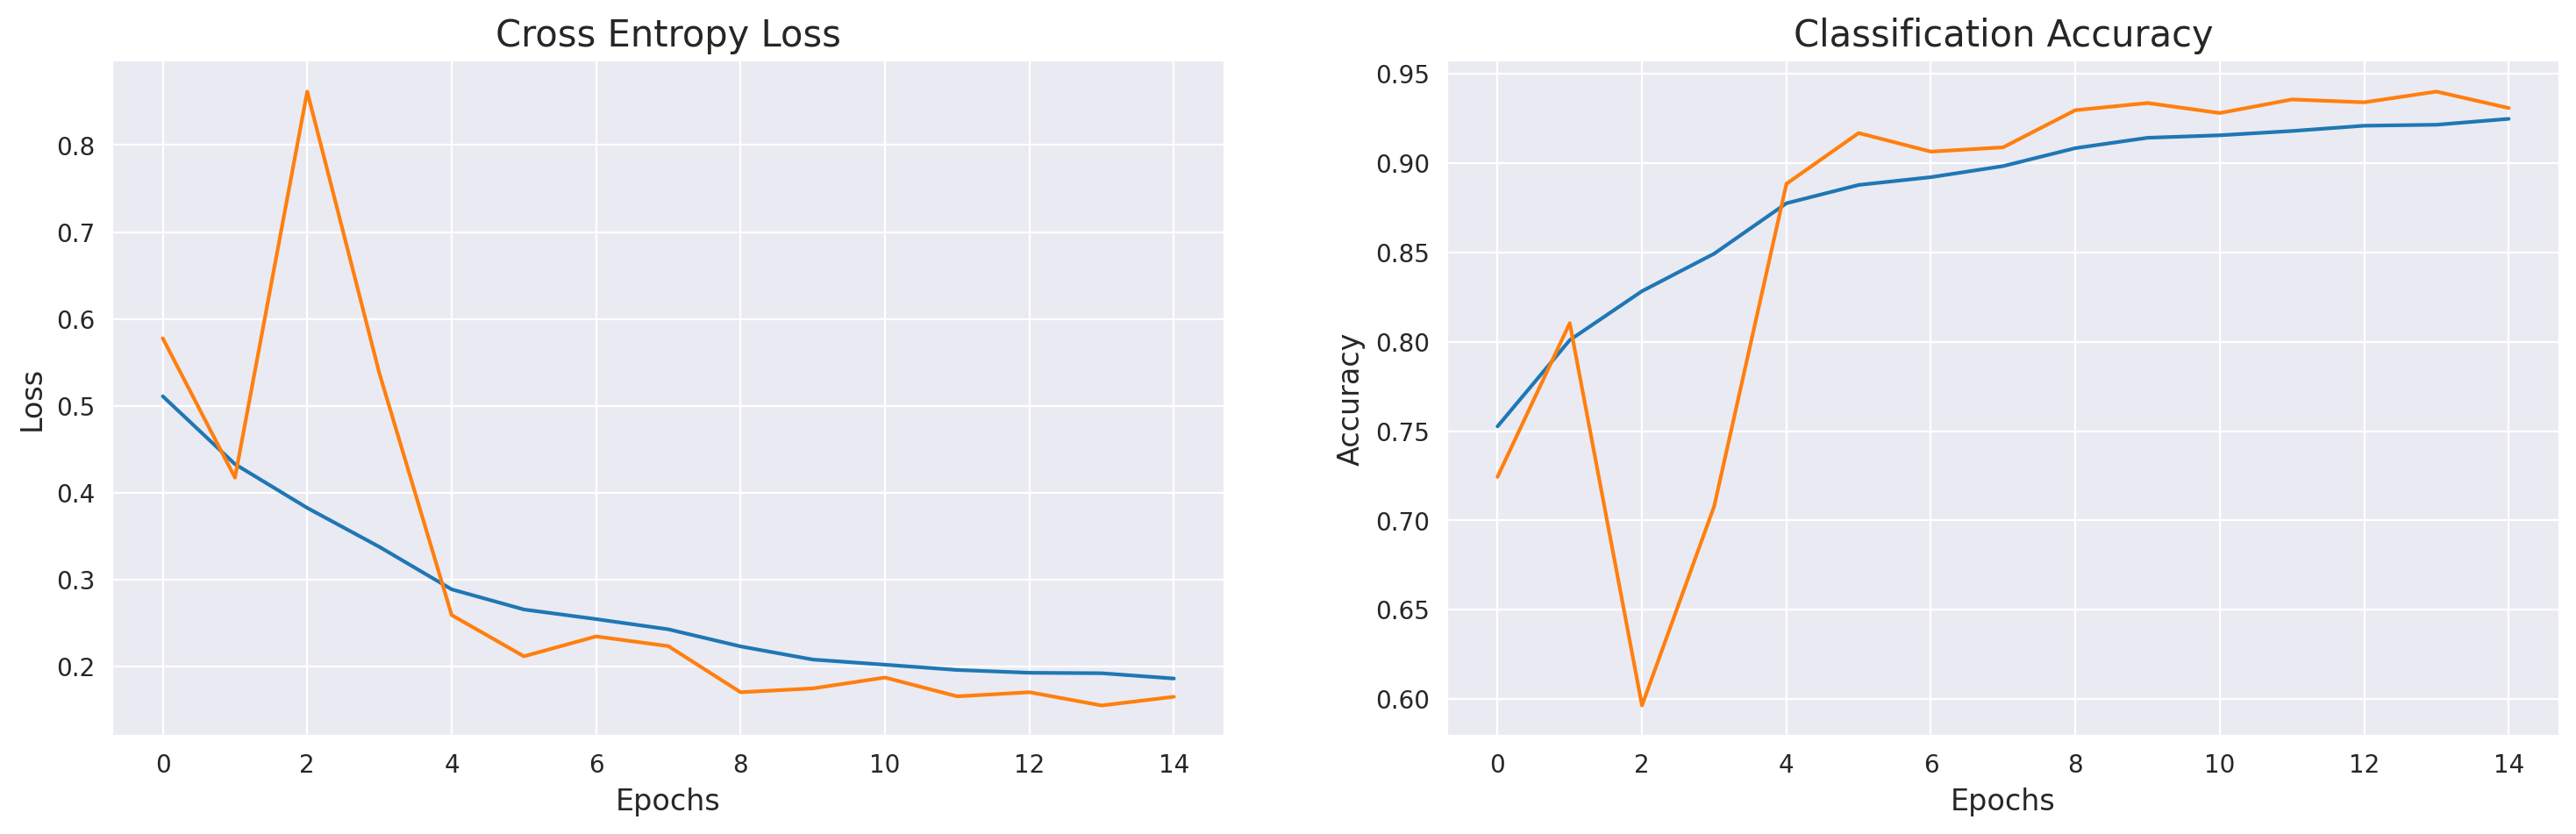

In [ ]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(cat_dog.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

<a id='18'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Evaluvation </h3> </div>

we will evaluvate the Training and validation data accuracy and loss.

In [ ]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 93.02999973297119
The Loss of the model for training data is: 0.1713554859161377
The accuracy of the model for validation data is: 93.99999976158142
The Loss of the model for validation data is: 0.15529383718967438


Finally, we will save the model for future use.

In [ ]:
# Save the Model
model.save("model.h5")

<a id='19'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Prediction </h2> </div>

Now, we will predict the model on test dataset.

In [ ]:
# prediction
result = model.predict(test_generator,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

# Evaluvate
loss,acc = model.evaluate(test_generator, batch_size = bat_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 93.27999949455261
The Loss of the model for testing data is: 0.1625753492116928


Classification report

In [ ]:
labels =['Cat','Dog']
print(classification_report(y_true, y_pred,target_names=labels))

              precision    recall  f1-score   support

         Cat       0.92      0.94      0.93      1250
         Dog       0.94      0.92      0.93      1250

    accuracy                           0.93      2500
   macro avg       0.93      0.93      0.93      2500
weighted avg       0.93      0.93      0.93      2500



confusioin matrix

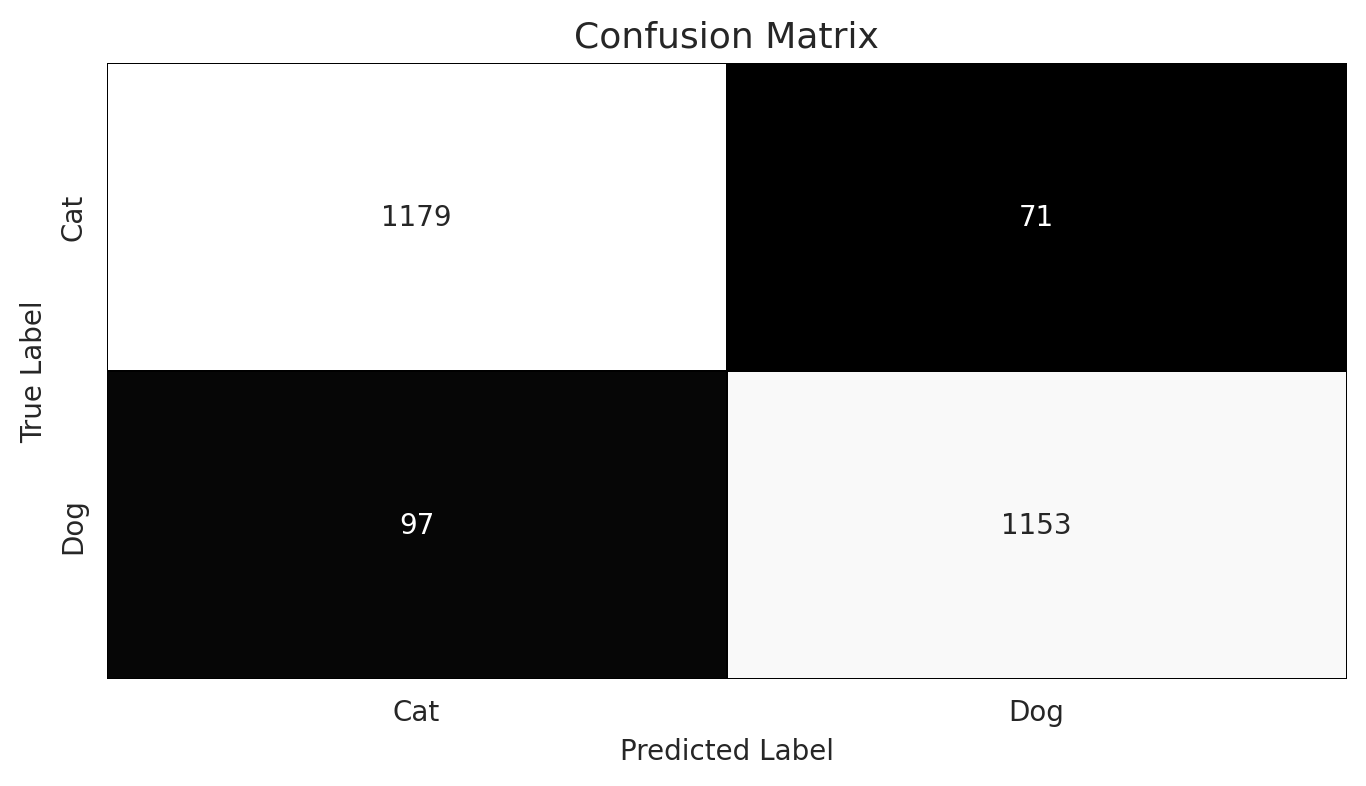

In [ ]:
confusion_mtx = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (8,4),dpi=200)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("True Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=13)

plt.show()

<a id='20'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> submission </h2> </div>
Make predictions on kaggle test data for submission.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = '/kaggle/working/test1/10885.jpg'
img = image.load_img(img_path, target_size=(128, 128))  # Ensure size matches model input
img_array = image.img_to_array(img) / 255.0  # Scale pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
test1_predict = model.predict(img_array, verbose=0)  # Predict returns probabilities
test1_predict_argmax = np.argmax(test1_predict, axis=1)  # Get the class index

# Mapping predictions to labels
label_mapping = {0: 'cat', 1: 'dog'}
predicted_label = label_mapping[test1_predict_argmax[0]]

print(f"The predicted label is: {predicted_label}")

The predicted label is: cat


In [ ]:
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, image_channel))
base_model.trainable = False

model3 = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

model3.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 2, 2, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_95               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,000,674 (99.18 MB)

 Trainable params: 4,196,866 (16.01 MB)

 Non-trainable params: 21,803,808 (83.17 MB)

In [ ]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
cat_dog3 = model3.fit(train_generator,
                    validation_data = val_generator,
                    epochs = 10,
                    # steps_per_epoch = len(train_generator),
                    # validation_steps = len(val_generaotor),
                   )

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 226ms/step - accuracy: 0.8942 - loss: 0.2567 - val_accuracy: 0.9344 - val_loss: 0.1687
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 205ms/step - accuracy: 0.9228 - loss: 0.1877 - val_accuracy: 0.9384 - val_loss: 0.1370
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 209ms/step - accuracy: 0.9235 - loss: 0.1871 - val_accuracy: 0.9456 - val_loss: 0.1403
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 217ms/step - accuracy: 0.9240 - loss: 0.1829 - val_accuracy: 0.9456 - val_loss: 0.1364
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 211ms/step - accuracy: 0.9294 - loss: 0.1679 - val_accuracy: 0.9400 - val_loss: 0.1351
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 211ms/step - accuracy: 0.9282 - loss: 0.1714 - val_accuracy: 0.9420 - val_loss: 0.1325
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 208ms/step - accuracy: 0.9329 - loss: 0.1683 - val_accuracy: 0.9396 - val_loss: 0.1357
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 212ms/step - accuracy: 0.9309 -

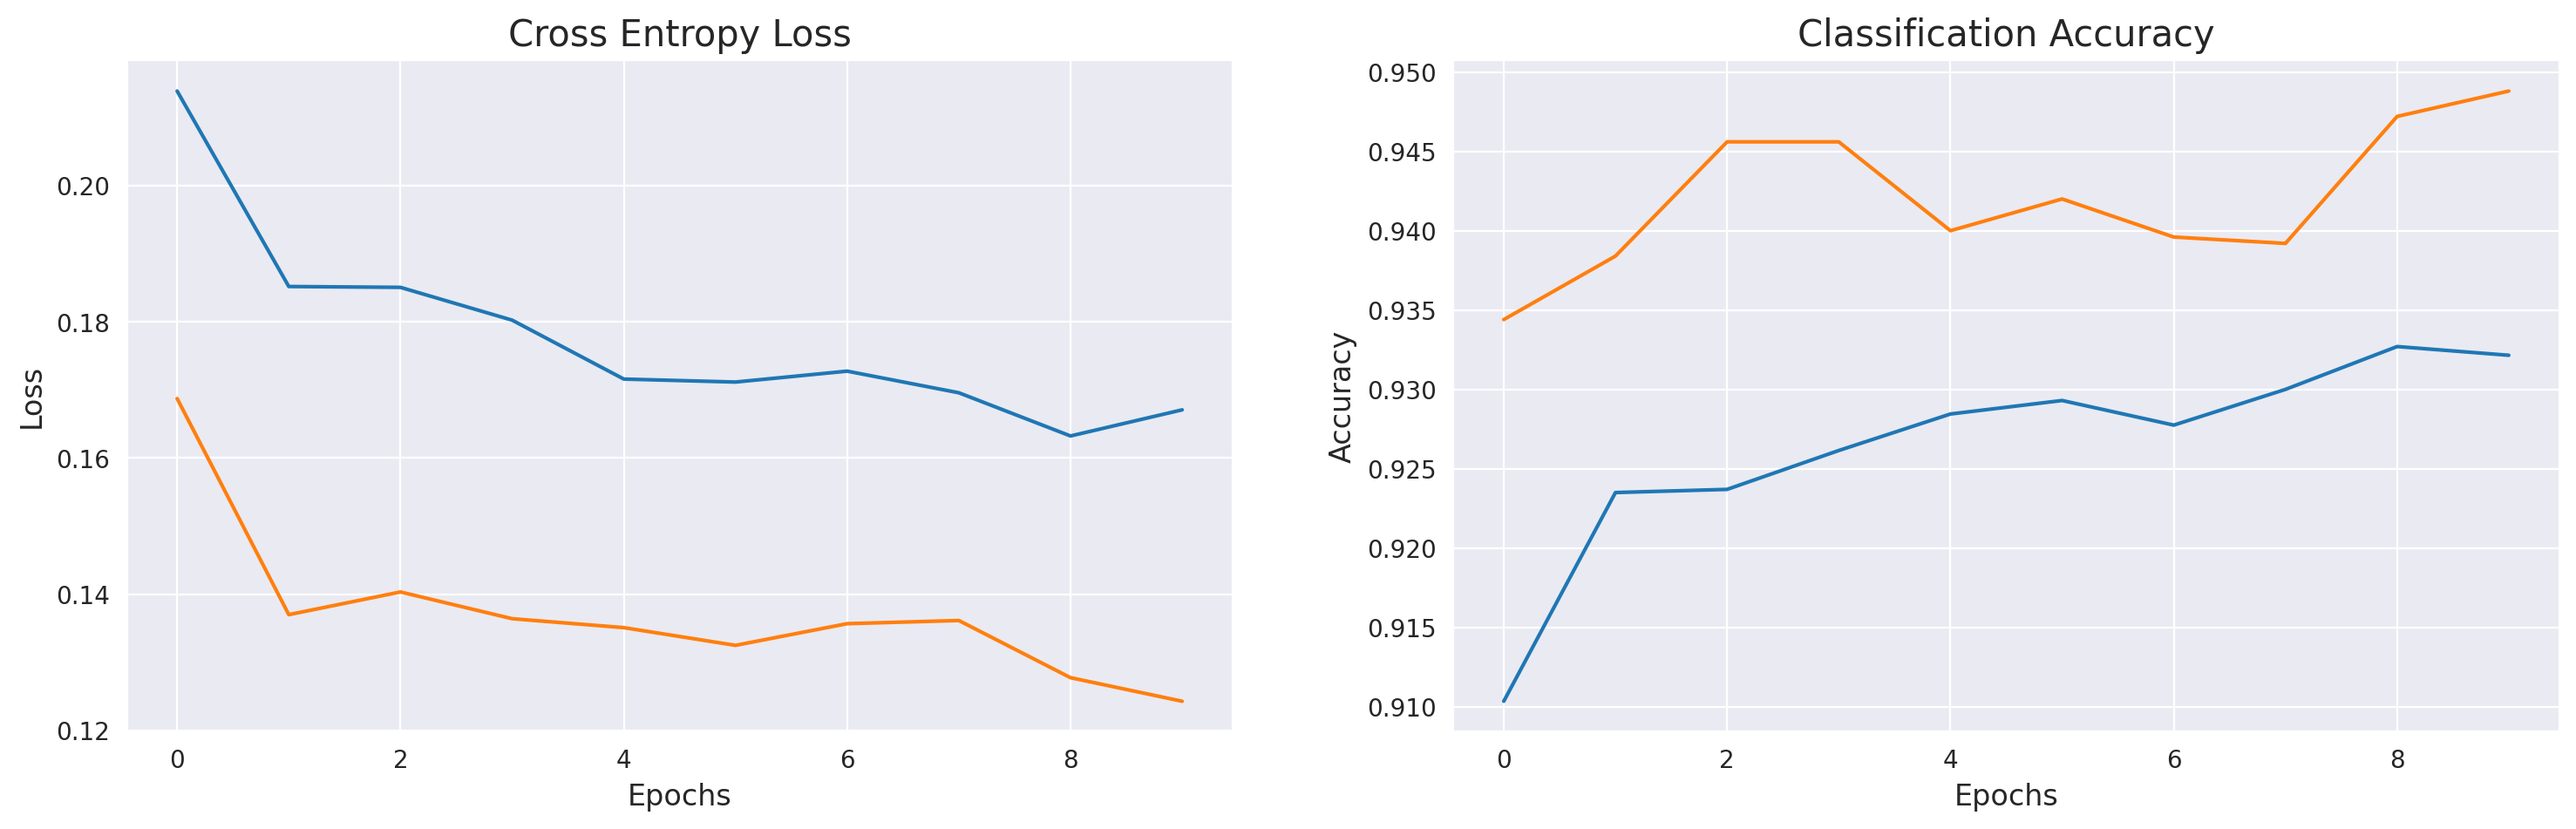

In [ ]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(cat_dog3.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = '/kaggle/working/test1/10885.jpg'
img = image.load_img(img_path, target_size=(128, 128))  # Ensure size matches model input
img_array = image.img_to_array(img) / 255.0  # Scale pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
test1_predict = model3.predict(img_array, verbose=0)  # Predict returns probabilities
test1_predict_argmax = np.argmax(test1_predict, axis=1)  # Get the class index

# Mapping predictions to labels
label_mapping = {0: 'cat', 1: 'dog'}
predicted_label = label_mapping[test1_predict_argmax[0]]

print(f"The predicted label is: {predicted_label}")

The predicted label is: cat


In [ ]:
from tensorflow.keras.applications import Xception

base_model = Xception(weights='imagenet', include_top=False, input_shape=(image_size, image_size, image_channel))
base_model.trainable = False

model4 = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

model4.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 4, 4, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_100              │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,642,282 (143.59 MB)

 Trainable params: 16,779,778 (64.01 MB)

 Non-trainable params: 20,862,504 (79.58 MB)

In [ ]:
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
cat_dog4 = model4.fit(train_generator,
                    validation_data = val_generator,
                    epochs = 10,
                    # steps_per_epoch = len(train_generator),
                    # validation_steps = len(val_generaotor),
                   )

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 226ms/step - accuracy: 0.9086 - loss: 0.2304 - val_accuracy: 0.9468 - val_loss: 0.1252
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 185s 213ms/step - accuracy: 0.9344 - loss: 0.1627 - val_accuracy: 0.9480 - val_loss: 0.1248
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 213ms/step - accuracy: 0.9382 - loss: 0.1510 - val_accuracy: 0.9476 - val_loss: 0.1223
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 217ms/step - accuracy: 0.9355 - loss: 0.1585 - val_accuracy: 0.9496 - val_loss: 0.1543
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 206ms/step - accuracy: 0.9394 - loss: 0.1475 - val_accuracy: 0.9516 - val_loss: 0.1148
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 203ms/step - accuracy: 0.9423 - loss: 0.1366 - val_accuracy: 0.9524 - val_loss: 0.1208
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 205ms/step - accuracy: 0.9399 - loss: 0.1455 - val_accuracy: 0.9512 - val_loss: 0.1142
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 206ms/step - accuracy: 0.9329 -

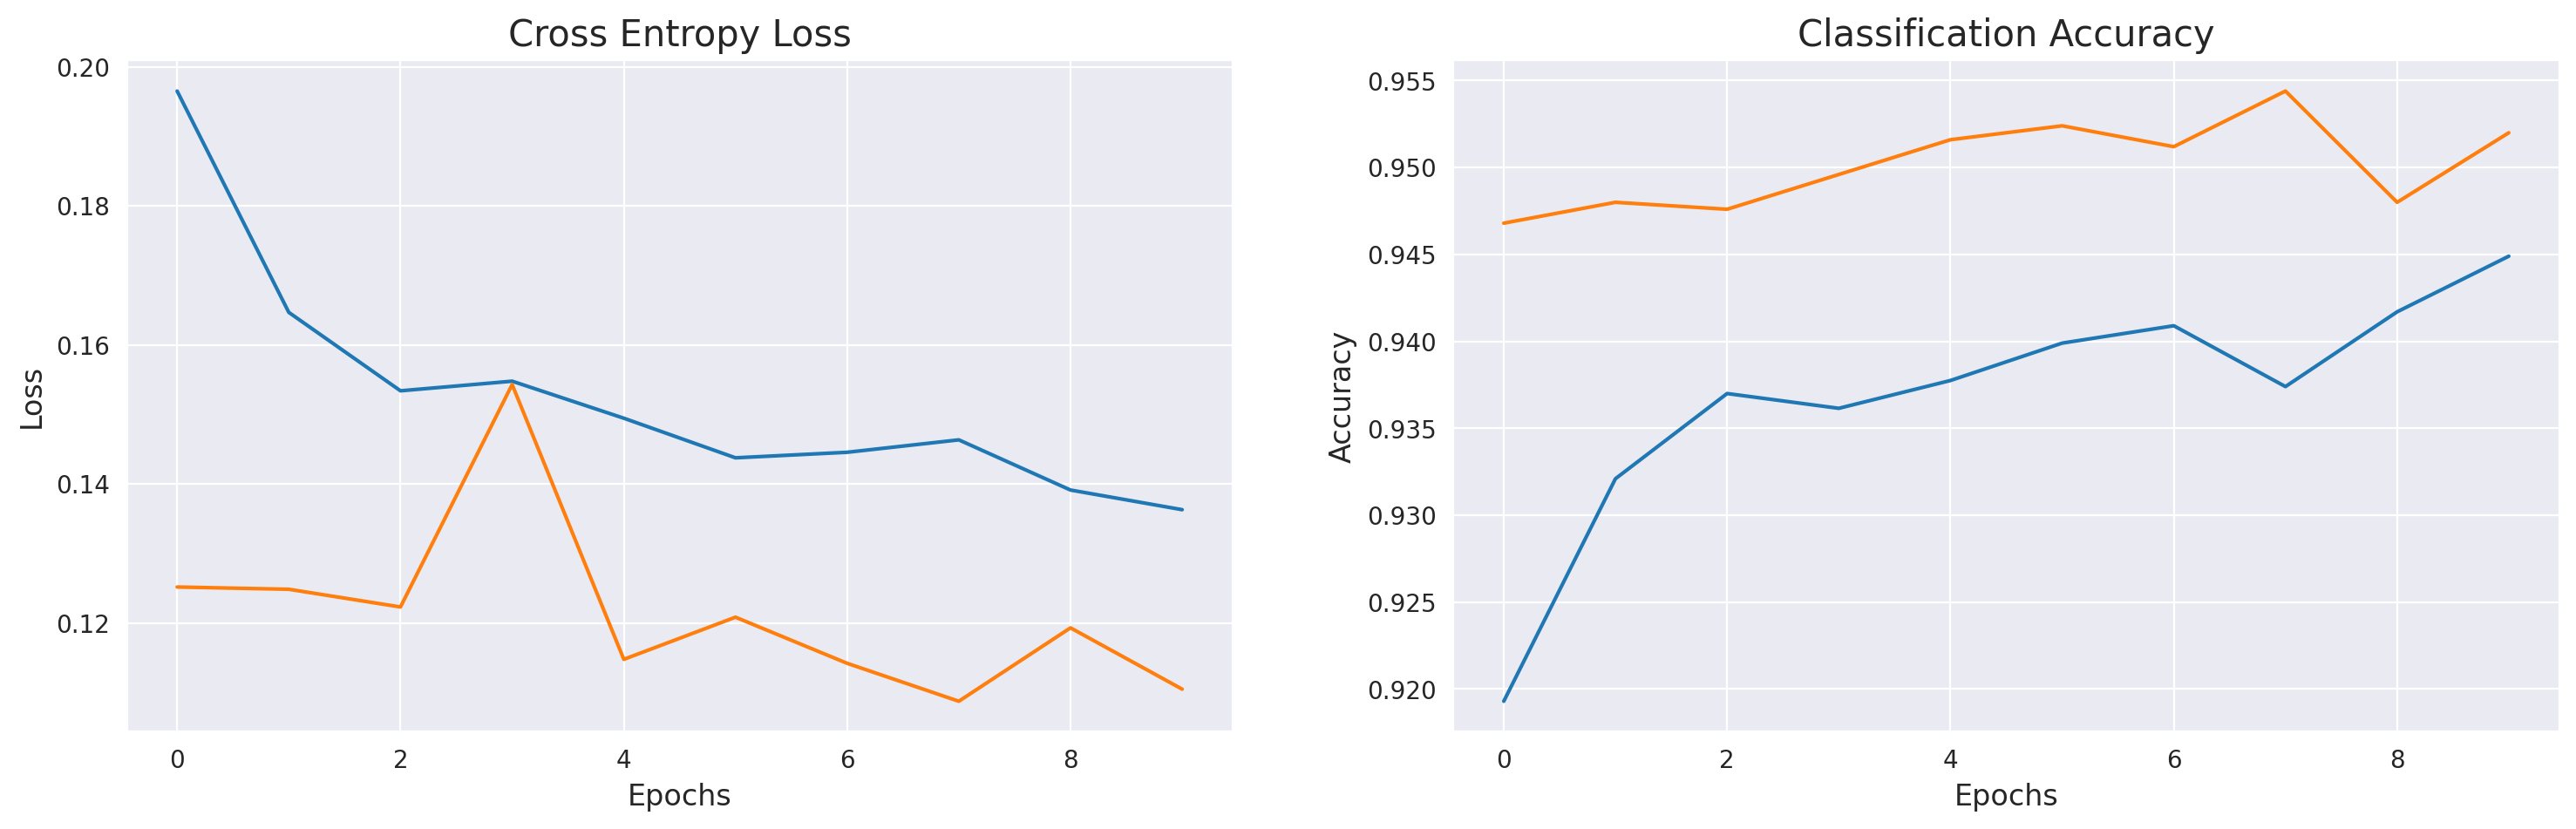

In [ ]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(cat_dog4.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = '/kaggle/working/test1/10885.jpg'
img = image.load_img(img_path, target_size=(128, 128))  # Ensure size matches model input
img_array = image.img_to_array(img) / 255.0  # Scale pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
test1_predict = model4.predict(img_array, verbose=0)  # Predict returns probabilities
test1_predict_argmax = np.argmax(test1_predict, axis=1)  # Get the class index

# Mapping predictions to labels
label_mapping = {0: 'cat', 1: 'dog'}
predicted_label = label_mapping[test1_predict_argmax[0]]

print(f"The predicted label is: {predicted_label}")

The predicted label is: cat


In [ ]:
from tensorflow.keras.applications import MobileNet

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(image_size, image_size, image_channel))
base_model.trainable = False

model5 = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

model5.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional)      │ (None, 4, 4, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,621,058 (44.33 MB)

 Trainable params: 8,391,170 (32.01 MB)

 Non-trainable params: 3,229,888 (12.32 MB)

In [ ]:
model5.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
cat_dog5 = model5.fit(train_generator,
                    validation_data = val_generator,
                    epochs = 10,
                    # steps_per_epoch = len(train_generator),
                    # validation_steps = len(val_generaotor),
                   )

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 200ms/step - accuracy: 0.9453 - loss: 0.1497 - val_accuracy: 0.9764 - val_loss: 0.0632
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 197ms/step - accuracy: 0.9639 - loss: 0.0925 - val_accuracy: 0.9672 - val_loss: 0.0863
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 194ms/step - accuracy: 0.9713 - loss: 0.0770 - val_accuracy: 0.9756 - val_loss: 0.0603
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 195ms/step - accuracy: 0.9728 - loss: 0.0719 - val_accuracy: 0.9780 - val_loss: 0.0568
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 195ms/step - accuracy: 0.9736 - loss: 0.0706 - val_accuracy: 0.9788 - val_loss: 0.0537
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 199ms/step - accuracy: 0.9739 - loss: 0.0678 - val_accuracy: 0.9748 - val_loss: 0.0586
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 195ms/step - accuracy: 0.9742 - loss: 0.0701 - val_accuracy: 0.9752 - val_loss: 0.0649
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 196ms/step - accuracy: 0.9769 -

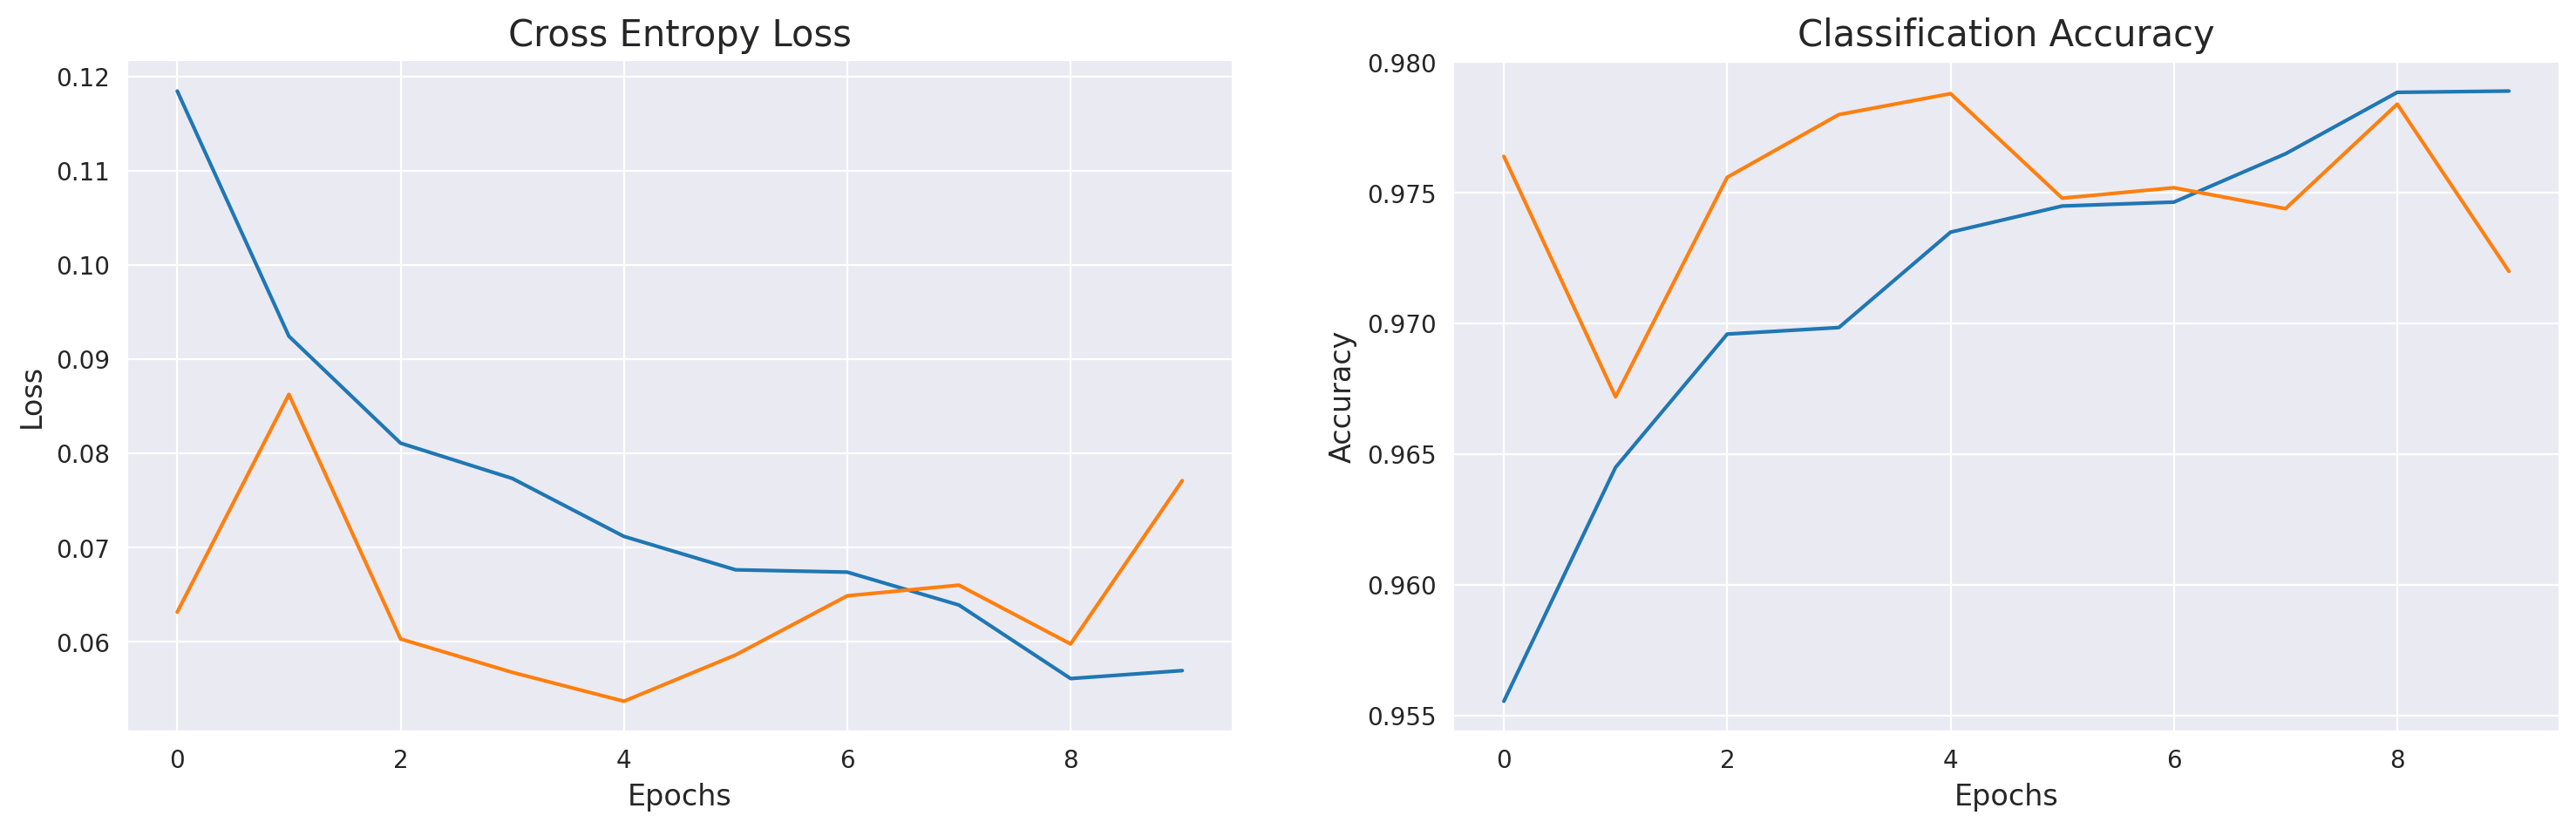

In [ ]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(cat_dog5.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = '/kaggle/working/test1/10885.jpg'
img = image.load_img(img_path, target_size=(128, 128))  # Ensure size matches model input
img_array = image.img_to_array(img) / 255.0  # Scale pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
test1_predict = model5.predict(img_array, verbose=0)  # Predict returns probabilities
test1_predict_argmax = np.argmax(test1_predict, axis=1)  # Get the class index

# Mapping predictions to labels
label_mapping = {0: 'cat', 1: 'dog'}
predicted_label = label_mapping[test1_predict_argmax[0]]

print(f"The predicted label is: {predicted_label}")

The predicted label is: cat


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Directories
train_dir = '/kaggle/working/dataset_dogs_vs_cats/train'
validation_dir = '/kaggle/working/dataset_dogs_vs_cats/test'

# Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

# ANN Model
model6 = Sequential([
    Flatten(input_shape=(128, 128, 3)),  # Flatten the image into a vector
    Dense(512, activation='relu'),  # First hidden layer with 512 neurons
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),  # Second hidden layer
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),  # Third hidden layer
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),  # Fourth hidden layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the Model
model6.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = model6.fit(train_generator, epochs=50, validation_data=validation_generator)

# Save the Model
model6.save('cats_and_dogs_ann.h5')


Found 19910 images belonging to 2 classes.
Found 5090 images belonging to 2 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


623/623 ━━━━━━━━━━━━━━━━━━━━ 489s 777ms/step - accuracy: 0.5156 - loss: 0.8651 - val_accuracy: 0.4959 - val_loss: 0.8555
Epoch 2/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 443s 708ms/step - accuracy: 0.5360 - loss: 0.7448 - val_accuracy: 0.5639 - val_loss: 0.6805
Epoch 3/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 507s 716ms/step - accuracy: 0.5313 - loss: 0.7300 - val_accuracy: 0.5536 - val_loss: 0.6888
Epoch 4/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 501s 713ms/step - accuracy: 0.5433 - loss: 0.7151 - val_accuracy: 0.5697 - val_loss: 0.6776
Epoch 5/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 452s 724ms/step - accuracy: 0.5456 - loss: 0.7136 - val_accuracy: 0.5701 - val_loss: 0.6763
Epoch 6/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 491s 706ms/step - accuracy: 0.5527 - loss: 0.6984 - val_accuracy: 0.5788 - val_loss: 0.6710
Epoch 7/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 432s 692ms/step - accuracy: 0.5526 - loss: 0.7017 - val_accuracy: 0.5711 - val_loss: 0.6798
Epoch 8/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 443s 709ms/step - accuracy: 0.5613 - loss: 0.69

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = '/kaggle/working/test1/10018.jpg'
img = image.load_img(img_path, target_size=(128, 128))  # Ensure size matches model input
img_array = image.img_to_array(img) / 255.0  # Scale pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
test1_predict = model6.predict(img_array, verbose=0)  # Predict returns probabilities
test1_predict_argmax = np.argmax(test1_predict, axis=1)  # Get the class index

# Mapping predictions to labels
label_mapping = {0: 'cat', 1: 'dog'}
predicted_label = label_mapping[test1_predict_argmax[0]]

print(f"The predicted label is: {predicted_label}")

The predicted label is: cat


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np

# Parameters
IMG_SIZE = (224, 224)

# Define paths (update these to your dataset)
train_dir = "/kaggle/working/dataset_dogs_vs_cats/train"
validation_dir = "/kaggle/working/dataset_dogs_vs_cats/test"

# Data generators for ResNet50
datagen_resnet = ImageDataGenerator(
    preprocessing_function=resnet_preprocess,
    validation_split=0.2
)

train_generator_resnet = datagen_resnet.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator_resnet = datagen_resnet.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Build ResNet50 model
def build_resnet50():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

resnet50_model = build_resnet50()

# Train ResNet50
print("Training ResNet50...")
resnet50_model.fit(train_generator_resnet, validation_data=validation_generator_resnet, epochs=5)

# Predict with ResNet50
def predict_resnet(image_path):
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = resnet_preprocess(img_array)

    prediction = resnet50_model.predict(img_array)
    return "Dog" if prediction[0] > 0.5 else "Cat"

image_path = "/kaggle/working/test1/10220.jpg"
print("ResNet50 Prediction:", predict_resnet(image_path))


Found 15929 images belonging to 2 classes.
Found 1017 images belonging to 2 classes.
Training ResNet50...
Epoch 1/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 3415s 7s/step - accuracy: 0.9707 - loss: 0.0792 - val_accuracy: 0.9823 - val_loss: 0.0427
Epoch 2/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 3406s 7s/step - accuracy: 0.9886 - loss: 0.0312 - val_accuracy: 0.9853 - val_loss: 0.0408
Epoch 3/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 3341s 7s/step - accuracy: 0.9937 - loss: 0.0195 - val_accuracy: 0.9803 - val_loss: 0.0513
Epoch 4/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 3391s 7s/step - accuracy: 0.9951 - loss: 0.0154 - val_accuracy: 0.9872 - val_loss: 0.0395
Epoch 5/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 3423s 7s/step - accuracy: 0.9963 - loss: 0.0110 - val_accuracy: 0.9754 - val_loss: 0.0795
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
ResNet50 Prediction: Dog
